In [1]:
# API key to use Alphavantage API
# API_KEY = 'GFEUWTGIZCE8MBIQ'

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from sklearn.metrics import mean_squared_error, mean_absolute_error

ModuleNotFoundError: No module named 'yfinance'

In [3]:
start = '2013-01-01'
end = datetime.strftime(datetime.today(), '%Y-%m-%d')

In [4]:
# Top 10 contributors from S&P 500 ETF (2023)
top10 = ['AAPL', 'MSFT', 'AMZN', 'NVDA', 'GOOGL', 'META', 'GOOG', 'TSLA', 'AVGO', 'JPM']

In [5]:
df = yf.download(top10[3], start=start, end=end)
df = df.reset_index()

[*********************100%%**********************]  1 of 1 completed


In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,44.980000,45.000000,44.220001,44.660000,33.084869,31413000
1,2013-01-03,44.740002,44.750000,44.200001,44.570000,33.018200,24227700
2,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.603443,24487700
3,2013-01-07,45.090000,45.490002,45.020000,45.410000,33.640495,24456900
4,2013-01-08,45.400002,45.500000,44.959999,45.500000,33.707161,19624200


In [7]:
len(df)

2768

In [8]:
ma_100 = df.Close.rolling(100).mean()
ma_100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2763    149.6638
2764    149.7842
2765    149.9180
2766    150.0534
2767    150.1956
Name: Close, Length: 2768, dtype: float64

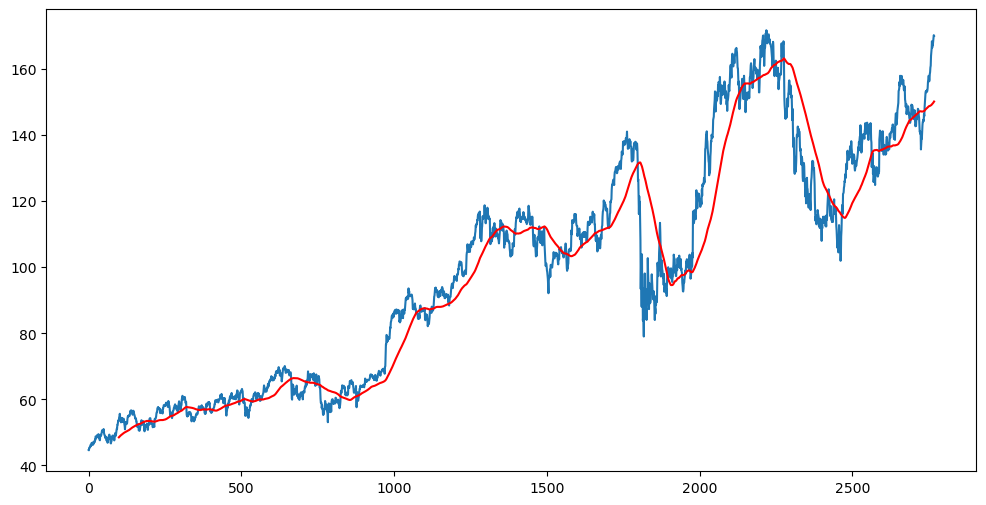

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(ma_100, color='red')
plt.show()

In [10]:
ma_200 = df.Close.rolling(200).mean()
ma_200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2763    144.53455
2764    144.70825
2765    144.89900
2766    145.07740
2767    145.28660
Name: Close, Length: 2768, dtype: float64

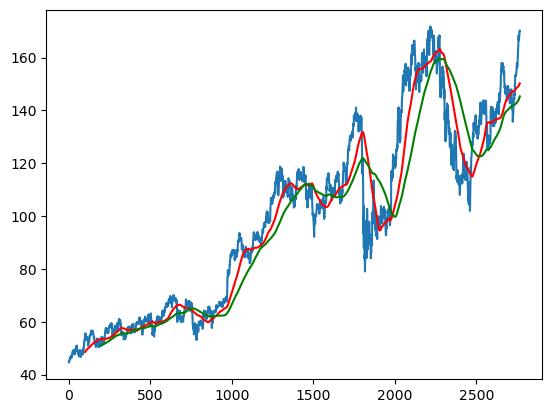

In [11]:
plt.plot(df['Close'])
plt.plot(ma_100, color='red')
plt.plot(ma_200, color='green')
plt.show()

In [12]:
dataTrain = np.array(df['Close'][:int(len(df) * 0.70)])
dataTest = np.array(df['Close'][int(len(df) * 0.70):])

In [13]:
mmscale = MinMaxScaler()

In [14]:
training = mmscale.fit_transform(dataTrain.reshape(-1,1))

In [15]:
X_train = []
y_train = []

In [16]:
period = 100
for i in range(period, len(training)):
    X_train.append(training[i-period:i])
    y_train.append(training[i][0])

In [17]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [18]:
# LSTM Model

In [28]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=60, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=1))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 60)           29040     
                                                                 
 dropout_6 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_7 (LSTM)               (None, 60)               

In [30]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
58/58 [==============================] - 8s 85ms/step - loss: 0.0469
Epoch 2/50
58/58 [==============================] - 7s 129ms/step - loss: 0.0114
Epoch 3/50
58/58 [==============================] - 6s 111ms/step - loss: 0.0075
Epoch 4/50
58/58 [==============================] - 9s 149ms/step - loss: 0.0068
Epoch 5/50
58/58 [==============================] - 7s 119ms/step - loss: 0.0062
Epoch 6/50
58/58 [==============================] - 5s 93ms/step - loss: 0.0062
Epoch 7/50
58/58 [==============================] - 5s 92ms/step - loss: 0.0057
Epoch 8/50
58/58 [==============================] - 5s 91ms/step - loss: 0.0051
Epoch 9/50
58/58 [==============================] - 5s 92ms/step - loss: 0.0052
Epoch 10/50
58/58 [==============================] - 5s 88ms/step - loss: 0.0055
Epoch 11/50
58/58 [==============================] - 5s 90ms/step - loss: 0.0047
Epoch 12/50
58/58 [==============================] - 5s 89ms/step - loss: 0.0047
Epoch 13/50
58/58 [==============

In [31]:
X_test = []
y_test = []

In [32]:
for i in range(period, len(training)):
    X_test.append(training[i - period: i])
    y_test.append(training[i][0])

In [33]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [34]:
prediction = model.predict(X_test)

58/58 [==============================] - 2s 23ms/step


In [35]:
factor = mmscale.scale_
prediction /= factor
y_test /= factor

In [36]:
mean_squared_error(prediction, y_test)

9.273653885195861

In [38]:
model.save('pred_model.keras')

In [39]:
model.save('pred_model.h5')